<a href="https://colab.research.google.com/github/ljs2021/Machine-Learning-Book-/blob/master/Week6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Decision Tree ***
 > 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙을 만드는 것 (if / else 느낌 ) 
 > 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 좌우한다. 
 > 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. >> 어떻게 트리를 분할(split)할것인가가 중요(데이터의 균일성 >> 균일도 측정 ( 엔트로피를 이용한 정보 이득지수(information gain) , 지니 계수)

*** Information gain ***
 >엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데 서로 다른 값이 섞여 있으면 엔트로피가 높고,같은 값이 섞여 있으면 엔트로피가 낮다. information gain은 1에서 엔트로피 지수를 뺀 값. 즉 information gain이 높은 속성을 기준으로 분할.

*** 지니 계수***
> 경제학에서 불평등 지수를 나타낼 때 사용하는 계수 0이 가장 평등하고 1로 갈수록 불평등하다.
데이터가 다양한 값을 가질수록 평등 , 특정값으로 쏠릴 경우 불평등한 값이 된다. 즉 다양성이 낮을 수록 균일도가 높다는 의미로서 1로 갈수록 균일도가 높으므로 지니 계수가 높은 속성으로 기준을 분할.

**Decision Tree의 특징**
> 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고 각 피처의 스케일리과 정규화 같은 전처리 작업이 필요 없다. 

> 단점 : 과적합으로 정확도가 떨어진다.(서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수 밖에 없다. 



**Decision Tree parameter**

min_samples_split
> 노드를 분할하기 위한 최소한의 샘플 데이터 수 > 과적합 제어 
default 2 작게 설정할수록 분할되는 노드가 많아짐 > 과적합 

min_samples_leaf
> 말단 노드가 되기 위한 최소한의 샘플 데이터 수

max_features 
> 최적의 분할을 위해 고려할 최대 피처 개수 default none (데이터 세트의 모든 피처를 사용해 분할 수행)

max_depth
> 트리의 최대 깊이를 규정 

max_leaf_nodes
> 말단 노드(leaf)의 최대 개수 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(random_state=777)

iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=777)

dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=777, splitter='best')

In [3]:
from sklearn.tree import export_graphviz

#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함 

export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,feature_names=iris_data.feature_names,impurity=True,filled=True)

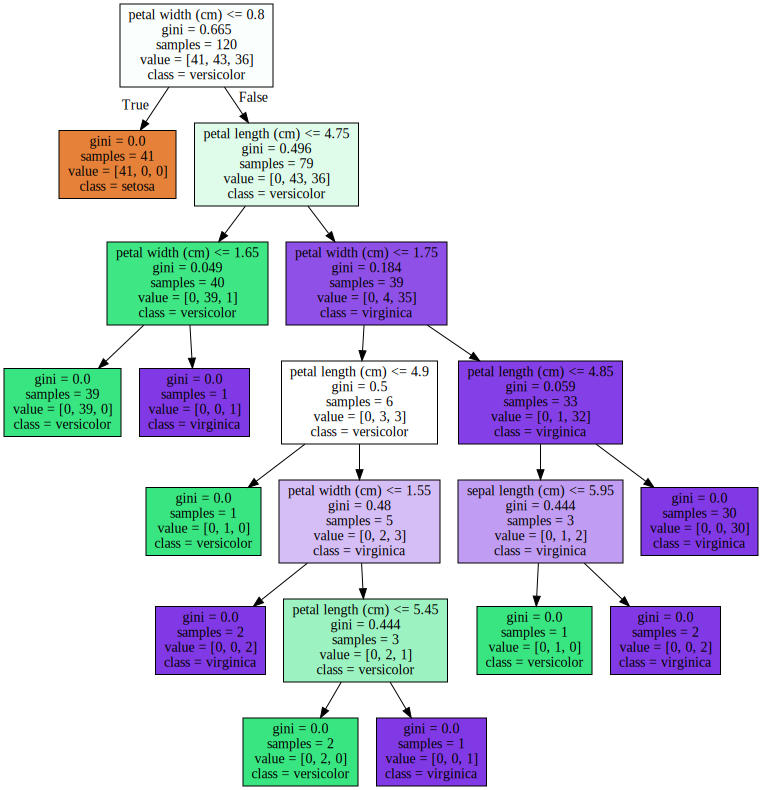

In [4]:
import graphviz

#위에서 생성된 tree.dot파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화 

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

##### 설명 #####
# petal length <= 0.8와 같이 피처 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건(규칙노드). 이 조건이 없으면 리프노드(결정된 분류값)
# gini 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수.
# samples는 규칙에 해당하는 데이터 건수.
# value = []는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0,1,2 품종을 가르킨다.
# ex) value [41,40,39] 면 Setosa 41개 Vesicolor 40개 Virginica39개로 데이터 구성.

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline 

#feature importance 추출
print("Feature importances :\n{}".format(np.round(dt_clf.feature_importances_,3)))

#feature 별 importance 매핑 
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
  print('{} : {:.3f}'.format(name,value))

 #feature importance를 column 별로 시각화
 #sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names) 

Feature importances :
[0.017 0.    0.409 0.575]
sepal length (cm) : 0.017
sepal width (cm) : 0.000
petal length (cm) : 0.409
petal width (cm) : 0.575


 # 결증 트리 과적합(Overfitting)

make_classification
> n_amples : 표본 데이터 수

> n_feature : 독립 변수의 수 (전체 피처의 수)

> n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분 수 

> n_classes : 종속 변수의 클래스 수 

> n_cluster_per_class : 클래스 당 클러스터의 수


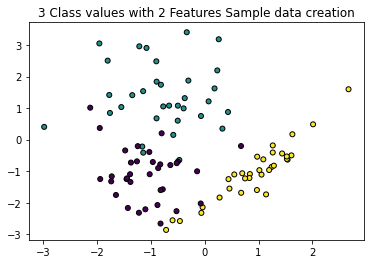

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피러는 2개 클래스는 3가지 유형의 분류 샘플 데이터 생성 
X_feature, y_labels = make_classification(n_features=2, n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=777 )


plt.scatter(X_feature[:,0],X_feature[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'clim'


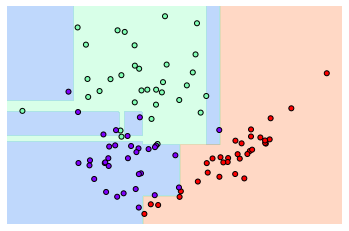

In [7]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_feature,y_labels) #파라미터 모두 default 값 
visualize_boundary(dt_clf,X_feature,y_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'clim'


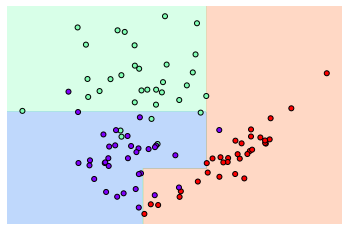

In [8]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_feature ,y_labels)
visualize_boundary(dt_clf,X_feature,y_labels)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'],engine='python')

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


**def get_human_dataset()**

train 디렉토리에 있는 학습용 피처 데이터 세트와 레이블 데이터 세트,test 디렉토리에 있는 테스트용 피러 데이터 파일과 레이블 데이터 파일을 각각 학습/테스트용 DataFrame에 로드.

각 데이터 파일은 공백으로 분뢰돼 있으므로 read_csv()의 sep 인자로 공백 문자를 입력. 레이블의 칼럼은 action으로 명명.

In [19]:
### features.txt 파일에 있는 컬럼명을 입력 받아서 중복된 컬럼명은 원본 컬럼명+_1, _2와 같이 중복된 차수를 원본 컬럼명에 더해서 컬럼명을 update 하는 함수임. . 
def get_new_feature_name_df(old_feature_name_df):
    #column_name으로 중복된 컬럼명에 대해서는 중복 차수 부여, col1, col1과 같이 2개의 중복 컬럼이 있을 경우 1, 2 
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    # feature_dup_df의 index인 column_name을 reset_index()를 이용하여 컬럼으로 변환. 
    feature_dup_df = feature_dup_df.reset_index()
    # 인자로 받은 features_txt의 컬럼명 DataFrame과 feature_dup_df를 조인. 
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # 새로운 컬럼명은 앞에 중복 차수를 접미어로 결합. 
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [20]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [21]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [22]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [23]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 위해 random_State
dt_clf = DecisionTreeClassifier(random_state=777)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuarcy = accuracy_score(y_test,pred)
print("결정 트리 예측 정확도 : {:.4f}".format(accuarcy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출 
print("DecisionTreeClassifier 기본 파라미터 \n",dt_clf.get_params())

결정 트리 예측 정확도 : 0.8565
DecisionTreeClassifier 기본 파라미터 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 777, 'splitter': 'best'}


In [26]:
# GridSearchCV를 사용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth값을 변화 시키면서 성능 측정 

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("GridSearchCV 최고 평균 정확도 수치: {:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최고 하이퍼 파라미터 :",grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.8527
GridSearchCV 최고 하이퍼 파라미터 : {'max_depth': 8}


In [30]:
#GridSearchCV 객체의 cv_results_속성을 DataFrame으로 생성 

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출 mean_train_score 이제 제공 안됨
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.849840
1,8,0.852702
2,10,0.852432
3,12,0.845632
4,16,0.847808
5,20,0.847943
6,24,0.845904


In [32]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [33]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [34]:
#최적의 파라미터 값을 보여주는 best_estimator_
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


## 결정 트리에서 각 피처의 중요도를 feature_importances_속성을 이용해 알아보자 

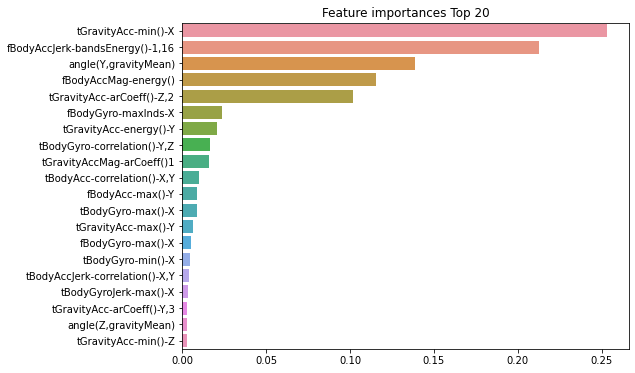

In [36]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()